In [2]:
!pip install newsapi-python

In [3]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key='134b56b7abb740c4b7b0fa4694b389c1')

In [7]:
# Fetch the stock news articles
stock_articles = newsapi.get_everything(q='AAPL OR Apple',from_param='2022-02-10',to='2022-03-08', sources='business-insider,bloomberg' ,language='en', sort_by='relevancy')

In [8]:
# Create a function - Create the sentiment scores DataFrame
def get_sentiment_scores(article_type, key_word):
    sentiments = []
    for article in article_type["articles"]:
        try:
            text = article[key_word]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({"text": text,
                               "date": date,
                               "compound": compound,
                               "positive": pos,
                               "negative": neg,
                               "neutral": neu
                               })
        except AttributeError:
            pass
    
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [9]:
# Create the stock sentiment scores DataFrame
stk_sentiment_df = get_sentiment_scores(stock_articles, 'content')
stk_sentiment_df

,text,date,compound,positive,negative,neutral
0,Airbnb is suspending operations in Russia and ...,2022-03-04,0.0000,0.000,0.000,1.000
1,Hello again. Apple just halted all product sal...,2022-03-02,0.0000,0.000,0.000,1.000
2,Large-cap tech stocks and cybersecurity compan...,2022-02-24,0.3818,0.174,0.104,0.722
3,Siri is Apple's always-on virtual assistant bu...,2022-02-26,0.0000,0.000,0.000,1.000
4,"When you buy through our links, Insider may ea...",2022-02-18,0.1689,0.049,0.000,0.951
5,Hi again. Apple will be unveiling new products...,2022-03-08,0.0000,0.000,0.000,1.000
6,The news: Stripe will be the first provider to...,2022-02-10,0.6808,0.194,0.073,0.733
7,Several people were involved in a hostage situ...,2022-02-22,0.0000,0.000,0.000,1.000
8,Apple is the defensive tech stock to own as Ru...,2022-03-08,0.0258,0.030,0.000,0.970
9,"When you buy through our links, Insider may ea...",2022-03-08,0.3774,0.103,0.000,0.897


In [10]:
# Describe the stock Sentiment
stk_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.088980,0.05745,0.033200,0.909300
std,0.393379,0.07000,0.054807,0.095983
min,-0.571900,0.00000,0.000000,0.722000
25%,0.000000,0.00000,0.000000,0.872250
50%,0.000000,0.03900,0.000000,0.919500
75%,0.391725,0.08725,0.077000,1.000000
max,0.802000,0.21500,0.154000,1.000000


In this section, you will use NLTK and Python to tokenize the text. Be sure to:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Convert the words to lowercase
    words = word_tokenize(re_clean.lower())
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [16]:
stk_sentiment_df["text"]

0     Airbnb is suspending operations in Russia and ...
1     Hello again. Apple just halted all product sal...
2     Large-cap tech stocks and cybersecurity compan...
3     Siri is Apple's always-on virtual assistant bu...
4     When you buy through our links, Insider may ea...
5     Hi again. Apple will be unveiling new products...
6     The news: Stripe will be the first provider to...
7     Several people were involved in a hostage situ...
8     Apple is the defensive tech stock to own as Ru...
9     When you buy through our links, Insider may ea...
10    Apple announced a new version of the iPad Air ...
11    The eyes of the world are on Europe. \r\nRussi...
12    When you buy through our links, Insider may ea...
13    When you buy through our links, Insider may ea...
14    A new report from nonprofit group Tech Transpa...
15    Warren Buffett likes to say his favorite holdi...
16    Warren Buffett's latest letter to Berkshire Ha...
17    "Cryptocurrency is going to be a big part 

In [17]:
# Create a new tokens column for stock
stk_sentiment_df['tokens'] = stk_sentiment_df['text'].apply(tokenizer)


In [18]:
##NGrams and Frequency Analysis

from collections import Counter
from nltk import ngrams

def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

stk_tokens = get_token(stk_sentiment_df)

def bigram_counter(tokens, N): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=N)
    return dict(Counter(bigrams).most_common(10))
# Generate the Bitcoin N-grams where N=2
stk_ngram = bigram_counter(stk_tokens, 2)

# Use the token_count function to generate the top 10 words
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for stock
token_count(stk_tokens, 10)

[('char', 20),
 ('apple', 9),
 ('new', 7),
 ('insider', 5),
 ('link', 5),
 ('tech', 4),
 ('buy', 4),
 ('may', 4),
 ('earn', 4),
 ('affiliate', 4)]

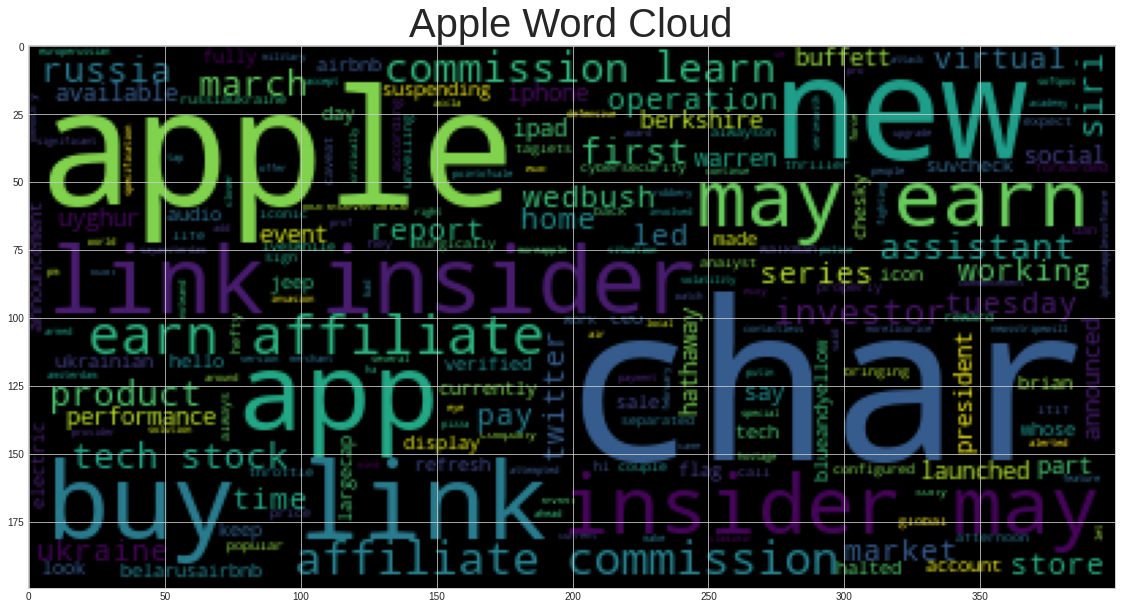

In [21]:
#Word Clouds


from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(stk_tokens))
plt.title("Apple Word Cloud", fontsize = 40)
plt.imshow(wc)